## Data Set Information

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data. 

The data set under study is related to 2-year usage log of a bike sharing system namely Captial Bike Sharing (CBS) at Washington, D.C. There are two reasons behind selecting this dataset.

1) It includes at least two of full life-cycle of the system and therefore seems be suitable for supervised learning. 

2) There exist some external sources that corresponding historical environmental values such as weather conditions, weekday and holidays are extractable.

In the Bike Sharing system when a rental occurs, the operation software collects basic data about the trip such as duration, start date, end date, start station, end station, bike number and member type. The historical data set of such trip transactions is available online. To avoid trend issues, we select only corresponding data to years 2017 and 2018 consisting
of 8760 instances. Each record includes Date, Rented Bike Count, Hour, Temperature, Humidity, Wind speed, Visibility, Drew point temperature, Solar Radiation, Rainfall, Snowfall, Season, Holiday, and Functioning Day.

_Dataset URL:_https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

## 1. Understanding the Data Set

The dataset shows hourly rental data of 2017 and 2018. Our goal is to predict the total count of bikes rented during each hour covered by the test set. The dataset has total 13 Independent variables and 1 Dependent variable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("SeoulBikeData.csv", encoding='latin1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
# .info will help understand the structure, data type and information about the missing values if any.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

The output of **_.info()_** clearly shows that there are no missing values in the dataset. Our project demands to have at least 5% missing values. We will achieve this by randomly replecing the non-null value with null value using **_mask_** and **_random_** function.

In [4]:
Rented_Bike_Count = df['Rented Bike Count']
hour = df['Hour']
df = df.drop(['Rented Bike Count', 'Hour'], axis = 1)
# mask is used to replace non-null values with null values. The percentage null value added to data is 7%
np.random.seed(0)
df = df.mask(np.random.random(df.shape) <= 0.07 , try_cast=True)
df['Rented Bike Count'] = Rented_Bike_Count
df['Hour'] = hour

In [5]:
# .info will help understand the structure, data type and information about the missing values if any.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8121 non-null   object 
 1   Temperature(°C)            8142 non-null   float64
 2   Humidity(%)                8140 non-null   float64
 3   Wind speed (m/s)           8165 non-null   float64
 4   Visibility (10m)           8115 non-null   float64
 5   Dew point temperature(°C)  8152 non-null   float64
 6   Solar Radiation (MJ/m2)    8159 non-null   float64
 7   Rainfall(mm)               8142 non-null   float64
 8   Snowfall (cm)              8188 non-null   float64
 9   Seasons                    8157 non-null   object 
 10  Holiday                    8121 non-null   object 
 11  Functioning Day            8159 non-null   object 
 12  Rented Bike Count          8760 non-null   int64  
 13  Hour                       8760 non-null   int64

In [6]:
pd.DataFrame(df.isnull().sum()).sum() / (14*8760)

0    0.060005
dtype: float64

Th output of **_.info()_** and above computation shows that we have successfuly added null values at complete random. Now the dataset has approx. **6.0%** null values.

## 2. Exploratory Data Analysis

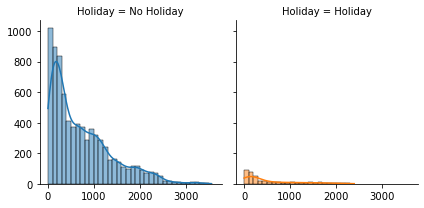

In [7]:
# Histogram of Rented bike count faceted by "Holiday"
g = sns.FacetGrid(df, col = "Holiday", hue = "Holiday")
g.map_dataframe(sns.histplot, x="Rented Bike Count", kde = True, binwidth = 100)

**Insights from above graph**
1) More number of bikes are rented if the day is "No Holiday"

2) The standar deviation for bike rented for "No Holiday" is more as compared to "Holiday". This is obvious becuase more number of bikes are used on Working day than non-working day.

3) Thus, If "Holiday" or "No Holiday" feature will be important in determining number of bikes rented.

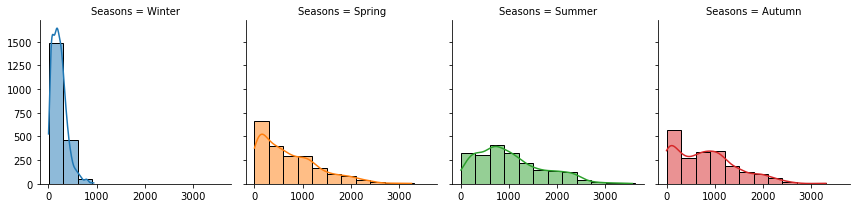

In [8]:
# Histogram of Rented bike count faceted by "Seasons"
g = sns.FacetGrid(df, col = "Seasons", hue = "Seasons")
g.map_dataframe(sns.histplot, x="Rented Bike Count", kde = True, binwidth = 300)

**Insights from above graph**
1) Far less number of bikes are being rented in Winter as compared to any other season indicating people usually do not prefer to ride bike in Winter season.

2) Except Winter we do not see discernible difference in Rented Bike Count.

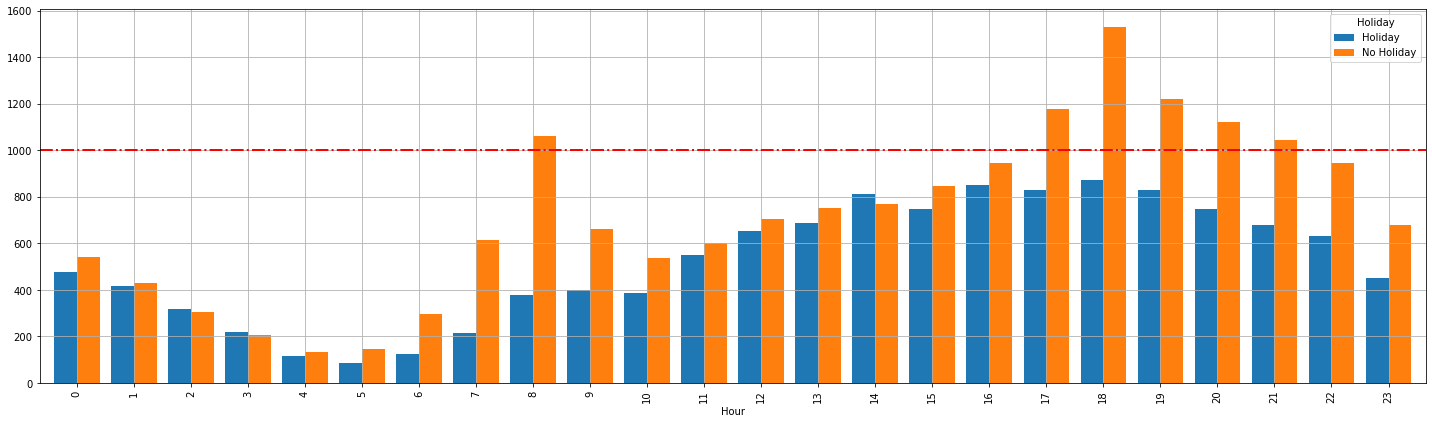

In [9]:
# Bar plot of "avg. rented bike count" by "Hour" and "Holiday"
hourly_holiday = df.groupby(["Hour", "Holiday"])["Rented Bike Count"].agg("mean").unstack()
hourly_holiday.plot(kind = "bar", figsize = (20,6), width = 0.8)
plt.grid(True)
# To identify peak hours where avg. rented bike count is greater than 1000 per hour
plt.axhline(y = 1000, color='r', linestyle='-.', lw = 2)
plt.tight_layout()

**Insights from above graph**
1) From above graph we are able to indetify peak hours where avg rented bike count is greater than 1000 bikes per hour.

2) For "No Holiday", 8th, 17th, 18th, 19th, 20th, 21th hours can be consider as peak hour. This is true becuase people usually go to work or come from wirk during aforementioned hours.

3) For "Holiday", there are no peak hours indicating high bike availability for entire day.

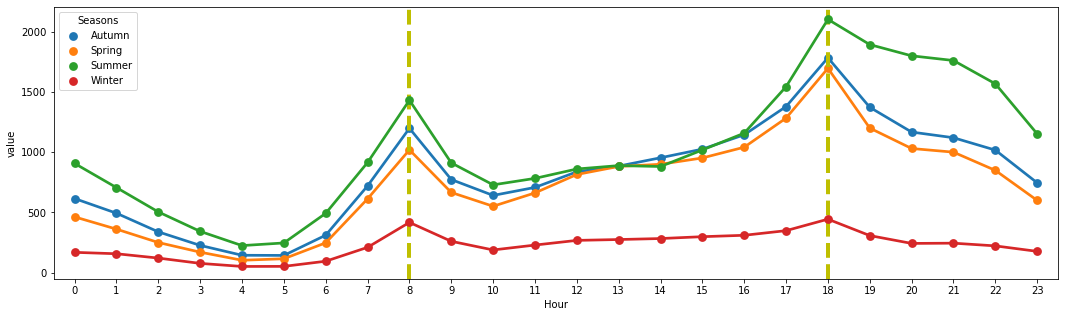

In [10]:
# Point plot of "avg. rented bike count" by "Hour" and "Seasons"
hourly_season = df.groupby(["Hour", "Seasons"])["Rented Bike Count"].agg("mean").unstack()
hourly_season = hourly_season.reset_index()
hourly_season = pd.melt(hourly_season, id_vars = "Hour", value_vars = ["Autumn", "Spring", "Summer", "Winter"])
fig, ax = plt.subplots(figsize=(18, 5))
# To identify peak hours where avg. rented bike count is greater.
sns.pointplot(x = hourly_season["Hour"], y = hourly_season["value"], hue = hourly_season["Seasons"], ax=ax)
plt.axvline(x = 8, color='y', linestyle='--', lw = 4)
plt.axvline(x = 18, color='y', linestyle='--', lw = 4)

**Insights from above graph**
1) From above graph we are able to indetify peak hours that is 8th and 18th where avg. rented bike count is high irrespective of the seasons. These hours conincides with the general working hours and may be the reason for high avg. rented bike count

2) Bikes are rented more in summer than any other season followed by Autumn and Spring

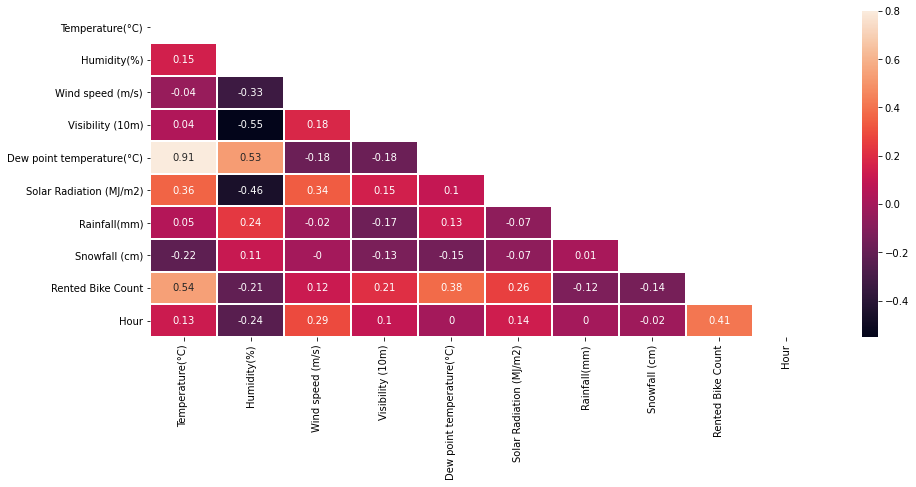

In [11]:
# correlation plot of continuous variable.
corr = round(df.corr(),2)
m = np.zeros_like(corr)
m[np.triu_indices_from(m)] = True
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(corr, mask = m, vmax=.8, square=False, annot=True, ax=ax, linewidths=1);

**Insights from above graph**
1) Dew point temperature and Temperature has the highest cpositive correlation.

2) Hour of the day and rented bike count has moderate positive correlation indicating Hour is important feature in determining target value.

3) Solar radiation and humidity has moderate negative correlation.

## 3. Data Preparation

To meet project criteria, initially, we had replaced non-null values with null values at complete random. As we are heading towards model building phase we will refine our data set and impute missing values using appropriate imputation technique.

### Imputation of Categorical Variable

In [12]:
# Mode imputation - Imputing missing values in "Seasons" column with the most frequent value.
df['Seasons'] = df['Seasons'].fillna('Summer')

# Mode imputation - Imputing missing values in "Holiday" column with the most frequent value.
df['Holiday'] = df['Holiday'].fillna(df['Holiday'].mode().iloc[0])

# Mode imputation - Imputing missing values in "FunctioningDay" column with the most frequent value.
df['Functioning Day'] = df['Functioning Day'].fillna(df['Holiday'].mode().iloc[0])

# Mode imputation - Imputing missing values in "hour" column with the most frequent value.
df['Hour'] = df['Hour'].fillna(df['Hour'].mode().iloc[0])

### Imputation of Countinuous Variable

For following column's missing value we will use "Group Mean Imputation" since the Temperature, Humidity, Wind speed, Visibility, Dew point temperature Solar Radiatio, Rainfall, Snowfall are determined by the particular season for e.g. Temperature is usually high in Summer and not Winter. Replacing null values with plain mean imputation will likely result in wrong imputation. Hence we chose "Group Mean Imputation" approach

In [13]:
# Group Mean imputation - Imputing missing values in "Temperature" column with the mean value of temperature for that Season.
df['Temperature(°C)'] = df.groupby(['Seasons'], sort = False)['Temperature(°C)'].apply(lambda x: x.fillna(x.mean()))

# Group Mean imputation - Imputing missing values in "Humidity" column with the mean value of humidity for that Season.
df['Humidity(%)'] = df.groupby(['Seasons'], sort = False)['Humidity(%)'].apply(lambda x: x.fillna(x.mean()))

# Group Mean imputation - Imputing missing values in "Wind speed" column with the mean value of wind speed for that Season.
df['Wind speed (m/s)'] = df.groupby(['Seasons'], sort = False)['Wind speed (m/s)'].apply(lambda x: x.fillna(x.mean()))

# Group Mean imputation - Imputing missing values in "Visibility" column with the mean value of visibility for that Season.
df['Visibility (10m)'] = df.groupby(['Seasons'], sort = False)['Visibility (10m)'].apply(lambda x: x.fillna(x.mean()))

# Group Mean imputation - Imputing missing values in "Dew point temperature" column with the mean value of temperature for that Season.
df['Dew point temperature(°C)'] = df.groupby(['Seasons'], sort = False)['Dew point temperature(°C)'].apply(lambda x: x.fillna(x.mean()))

# Group Mean imputation - Imputing missing values in "Solar Radiation" column with the mean value of solar radication for that Season.
df['Solar Radiation (MJ/m2)'] = df.groupby(['Seasons'], sort = False)['Solar Radiation (MJ/m2)'].apply(lambda x: x.fillna(x.mean()))

# Group Mean imputation - Imputing missing values in "Rainfall" column with the mean value of rainfall for that Season.
df['Rainfall(mm)'] = df.groupby(['Seasons'], sort = False)['Rainfall(mm)'].apply(lambda x: x.fillna(x.mean()))

# Group Mean imputation - Imputing missing values in "Snowfall" column with the mean value of snowfall for that Season.
df['Snowfall (cm)'] = df.groupby(['Seasons'], sort = False)['Snowfall (cm)'].apply(lambda x: x.fillna(x.mean()))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8121 non-null   object 
 1   Temperature(°C)            8760 non-null   float64
 2   Humidity(%)                8760 non-null   float64
 3   Wind speed (m/s)           8760 non-null   float64
 4   Visibility (10m)           8760 non-null   float64
 5   Dew point temperature(°C)  8760 non-null   float64
 6   Solar Radiation (MJ/m2)    8760 non-null   float64
 7   Rainfall(mm)               8760 non-null   float64
 8   Snowfall (cm)              8760 non-null   float64
 9   Seasons                    8760 non-null   object 
 10  Holiday                    8760 non-null   object 
 11  Functioning Day            8760 non-null   object 
 12  Rented Bike Count          8760 non-null   int64  
 13  Hour                       8760 non-null   int64

### Transforming multiple-category variable using one-hot vector

In [14]:
cols = pd.get_dummies(df['Hour'], prefix = 'Hour')
df[cols.columns] = cols
df = df.drop(['Hour'], axis = 1)
df.columns

Index(['Date', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Rented Bike Count', 'Hour_0', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23'],
      dtype='object')

In [15]:
cols = pd.get_dummies(df['Holiday'], prefix = 'Holiday')
df[cols.columns] = cols
df = df.drop(['Holiday'], axis = 1)
df.columns

Index(['Date', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Functioning Day', 'Rented Bike Count', 'Hour_0', 'Hour_1', 'Hour_2',
       'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9',
       'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15',
       'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21',
       'Hour_22', 'Hour_23', 'Holiday_Holiday', 'Holiday_No Holiday'],
      dtype='object')

In [16]:
cols = pd.get_dummies(df['Functioning Day'], prefix = 'Functioning Day')
df[cols.columns] = cols
df = df.drop(['Functioning Day'], axis = 1)
df.columns

Index(['Date', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Rented Bike Count', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning Day_No',
       'Functioning Day_No Holiday', 'Functioning Day_Yes'],
      dtype='object')

In [17]:
cols = pd.get_dummies(df['Seasons'], prefix = 'Seasons')
df[cols.columns] = cols
df = df.drop(['Seasons'], axis = 1)
df.columns

Index(['Date', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Rented Bike Count', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning Day_No',
       'Functioning Day_No Holiday', 'Functioning Day_Yes', 'Seasons_Autumn',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter'],
      dtype='object')

### Separating Features and Target

In [18]:
X = df.drop(['Date','Rented Bike Count'], axis = 1)
y = df['Rented Bike Count']

In [19]:
X.info()
y.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Temperature(°C)             8760 non-null   float64
 1   Humidity(%)                 8760 non-null   float64
 2   Wind speed (m/s)            8760 non-null   float64
 3   Visibility (10m)            8760 non-null   float64
 4   Dew point temperature(°C)   8760 non-null   float64
 5   Solar Radiation (MJ/m2)     8760 non-null   float64
 6   Rainfall(mm)                8760 non-null   float64
 7   Snowfall (cm)               8760 non-null   float64
 8   Hour_0                      8760 non-null   uint8  
 9   Hour_1                      8760 non-null   uint8  
 10  Hour_2                      8760 non-null   uint8  
 11  Hour_3                      8760 non-null   uint8  
 12  Hour_4                      8760 non-null   uint8  
 13  Hour_5                      8760 

(8760,)

## 4. Model Creation and Evaluation

We are using train_test_split function from sklearn to split data into train and test.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
count,6570.000000,6570.000000,6570.000000,6570.000000,6570.000000,6570.000000,6570.000000,6570.000000,6570.000000,6570.000000,...,6570.000000,6570.000000,6570.000000,6570.000000,6570.000000,6570.000000,6570.000000,6570.000000,6570.000000,6570.000000
mean,0.532700,0.592941,0.232703,0.714906,0.600406,0.162214,0.004216,0.008403,0.041248,0.042161,...,0.040335,0.045205,0.954795,0.029833,0.068798,0.901370,0.232572,0.235312,0.300304,0.231811
std,0.207909,0.200620,0.135629,0.298220,0.224574,0.240635,0.031895,0.046716,0.198879,0.200972,...,0.196758,0.207770,0.207770,0.170138,0.253129,0.298187,0.422504,0.424226,0.458425,0.422021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.364437,0.438776,0.135135,0.489324,0.446429,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.547535,0.591837,0.216216,0.792832,0.618467,0.017045,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.705986,0.734694,0.310811,0.997458,0.787456,0.238636,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### KNeighborsRegressor

([<matplotlib.axis.XTick at 0x67f33d26a0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19')])

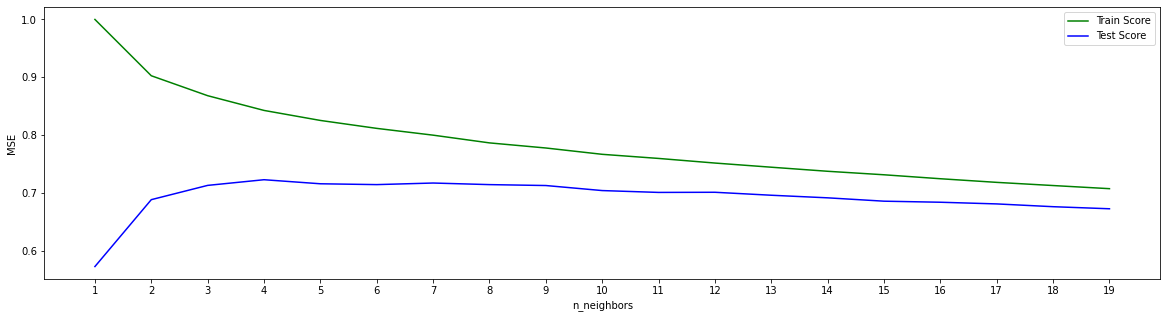

In [22]:
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,20)
plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('MSE')
plt.xticks(x_axis, np.arange(1,20))

We can observe from the graph that when n_neighbors = 5 the train score and test score has the minimum difference. Beyond n_neighbors though train and test score difference is getting smaller this magnitude can be overlooked.

### Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print("Train score for Linear Regression: {:.4f}".format(lreg.score(X_train, y_train)))
print("Test score for Linear Regression: {:.4f}".format(lreg.score(X_test, y_test)))

Train score for Linear Regression: 0.6482
Test score for Linear Regression: 0.6486


We can see that the train score and test score of a linear regression model is nealy equal. We may say that there is no problem of overfitting or underfitting

### Ridge

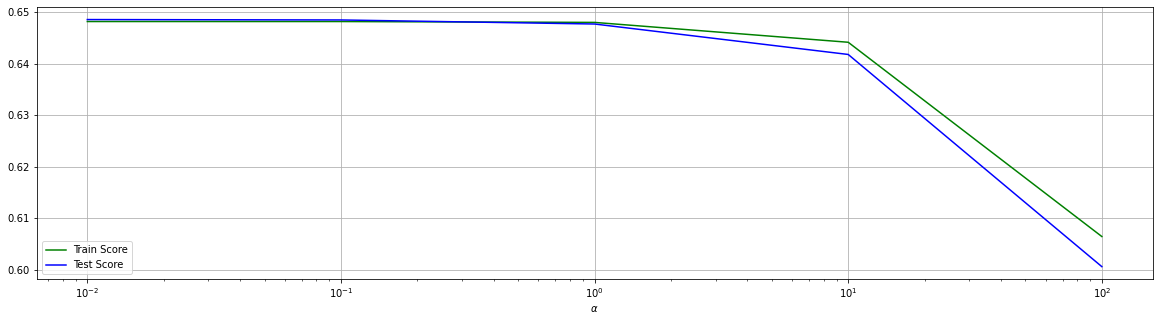

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

from sklearn.linear_model import Ridge

train_score_list = []
test_score_list = []

for alpha in [0.01, 0.1, 1, 10, 100]: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,  y_train)
    train_score_list.append(ridge.score(X_train, y_train))
    test_score_list.append(ridge.score(X_test, y_test))

%matplotlib inline
import matplotlib.pyplot as plt

x_range = [0.01, 0.1, 1, 10, 100]

plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

The best value fo Ridge regularization parameter (alpha) is 0.1 since the value of train and test score is approx. equal _(for train 64.82% and for test 64.85%)_

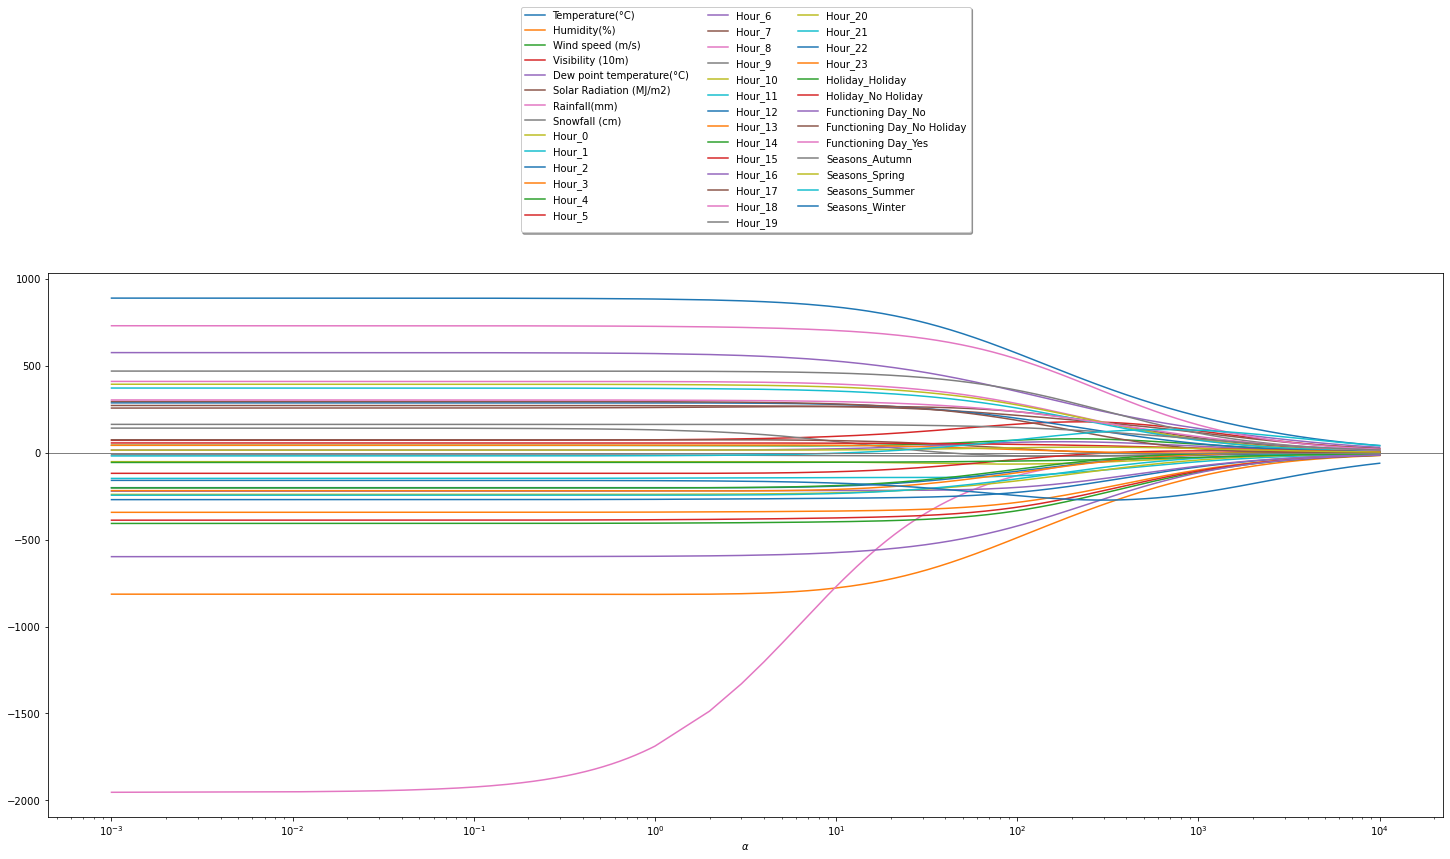

In [25]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

plt.subplots(figsize = (25,10))
for i in range(0,41):
    plt.plot(x_range, coeff[:,i], label = X.columns[i])

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

The above graph help us visualize the effect of alpha on the individual coefficient. We can see that the as we increase the value of alpha the magnitude of coefficient starts shrinking to zero. As the alpha value increases beyond 100 the coefficient start approaching towards 0.

### Lasso

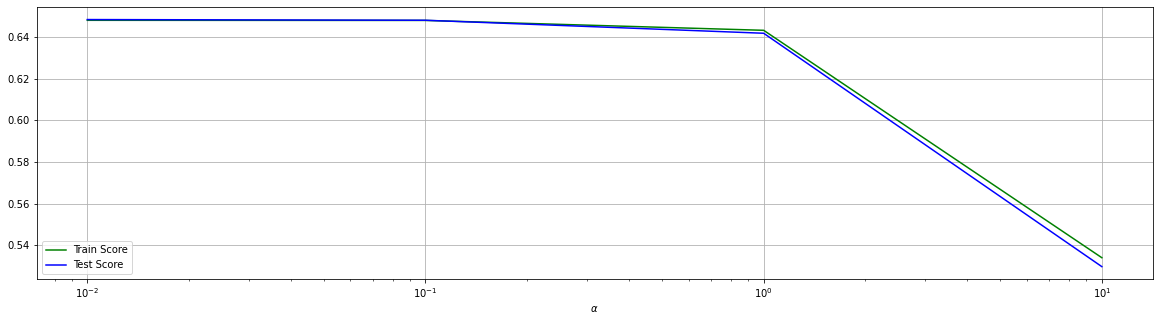

In [26]:
from sklearn.linear_model import Lasso

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

x_range = [0.01, 0.1, 1, 10]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha, max_iter = 10000)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

%matplotlib inline
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

The best value of Lasso regularization parameter (alpha) is 0.01 since the value of train and test score is approx. equal _(for train 64.81% and for test 64.82%)_

C:\Users\SONY\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5573269.505539775, tolerance: 273018.7502809894
  model = cd_fast.enet_coordinate_descent(


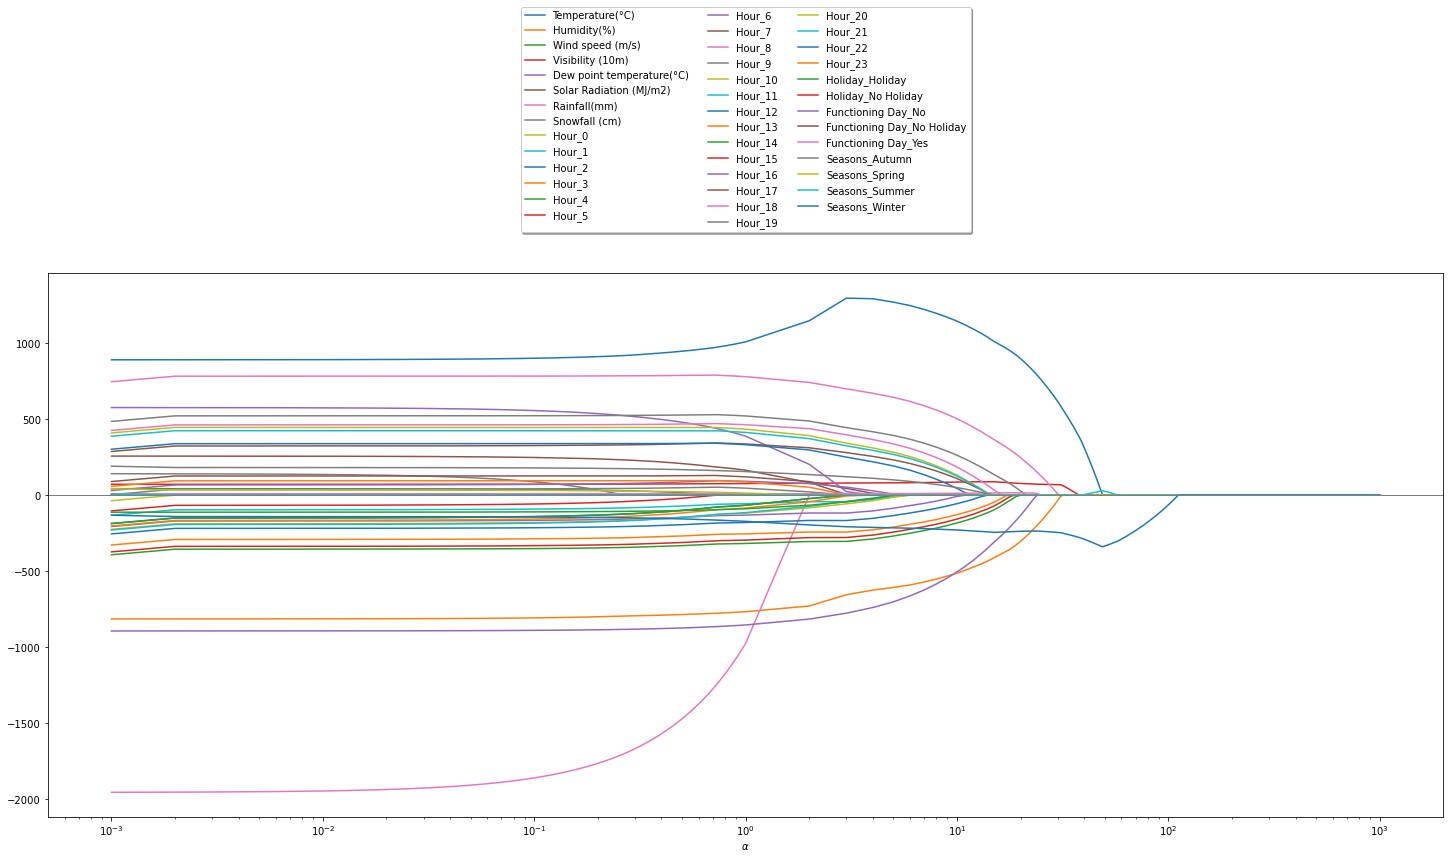

In [27]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha, max_iter = 10000)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

plt.subplots(figsize = (25,10))
for i in range(0,41):
    plt.plot(x_range, coeff[:,i], label = X.columns[i])

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

The above graph help us visualize the effect of alpha on the individual coefficient. We can see that the as we increase the value of alpha the magnitude of coefficient starts shrinking to zero. As the alpha value increases beyond 10 the coefficient start approaching towards 0.

### Polynomial regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

lreg = LinearRegression()
lreg.fit(X_train,y_train)

degrees = [2, 3]
train_score_list = []
test_score_list = []

for d in degrees:
    poly = PolynomialFeatures(degree = d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    train_score_list.append(poly_reg.score(X_train_poly,y_train))
    test_score_list.append(poly_reg.score(X_test_poly, y_test))

print(train_score_list)
print(test_score_list)

[0.8215633821857978, 0.9143100736926475]
[0.77742394847849, -172484422178540.4]


Here evaluated the polynomial regression model on train and test dataset. The parameter we tune is the degree of the polynomial. After executing both the model we can see that the polynomial regression model with degree 2 is performing better than the same with degree 3. Though the train score for polynomial regression model with degree 3 is greater than with 2, the test score for degree 3 is negative. This indicate the problem of overfitting. The model is able to perform well on seen data and rememberig the points but the model is not able to perform when provided with unseen data i.e. Test data. This is not the case with degree 2 and hence Polynomial Regression with degree 2 is selected.

### SVR

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

from sklearn.svm import SVR
svr = SVR().fit(X_train, y_train)
print("Train score for SVR: {:.4f}".format(svr.score(X_train, y_train)))
print("Test score for SVR: {:.4f}".format(svr.score(X_test, y_test)))

Train score for SVR: 0.1504
Test score for SVR: 0.1527


The train and test score are approx. similar indicating no problem of overfitting. However the score for Train and Test are equally low, indicating that model is performing badly.

### Linear SVR

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

from sklearn.svm import LinearSVR
lsvr = LinearSVR().fit(X_train, y_train)
print("Train score for Linear SVR: {:.4f}".format(lsvr.score(X_train, y_train)))
print("Test score for Linear SVR: {:.4f}".format(lsvr.score(X_test, y_test)))

Train score for Linear SVR: 0.3807
Test score for Linear SVR: 0.3786


The train and test score of a Linear SVR model is much better than the SVR model. However the other model like Polynomial Regression and Linear Regression are able to obtain much better score than Linear SVR.

### SGDRegressor

In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 100, learning_rate = 'constant', eta0 = 0.05, shuffle = False)
sgd_reg.fit(X_train, y_train)
print("Train score: {:.4f}".format(sgd_reg.score(X_train, y_train)))
print("Test score: {:.4f}".format(sgd_reg.score(X_test, y_test)))

Train score: 0.6125
Test score: 0.6119


The SGDRegressor is able to perform better without the challenge of overfitting. This model can be consider as a candidate model. We will refine this model by further finetuning the hyperparameter such as 'eta0' and max_iter. We will use GridSearch  for further refinement of this model.

# GridSearchCV

## GridSearchCV - Ridge

In [32]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

grid_search = GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

print("Best test score: {:.4f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'alpha': 0.1}
Best cross-validation score: 0.6421
Best test score: 0.6485


## GridSearchCV - Lasso

In [33]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

grid_search = GridSearchCV(Lasso(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

print("Best test score: {:.4f}".format(grid_search.score(X_test, y_test)))

C:\Users\SONY\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14080385.176633358, tolerance: 222341.66737983262
  model = cd_fast.enet_coordinate_descent(
C:\Users\SONY\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4345691.639608502, tolerance: 216512.59041575342
  model = cd_fast.enet_coordinate_descent(
C:\Users\SONY\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14893944.252382874, tolerance: 219635.41268217273
  model = cd_fast.enet_coordinate_descent(
C:\Users\SONY\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarni

Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.6421
Best test score: 0.6486


C:\Users\SONY\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5672662.294226646, tolerance: 273018.7502809894
  model = cd_fast.enet_coordinate_descent(


## GridSearchCV - SVR

In [34]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

param_grid = {'epsilon': [0.01, 0.1, 1, 10, 100],
            'gamma':[0.01,0.1,1,10,100],
             'C':[0.01,0.1,1,10,100]}

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

print("Best test score: {:.4f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'C': 100, 'epsilon': 100, 'gamma': 1}
Best cross-validation score: 0.7215
Best test score: 0.7483


## GridSearchCV - SGDRegressor

In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

param_grid = {'eta0': [0.001, 0.01, 0.1, 1, 10, 100],
               'max_iter' :[100, 1000, 10000]}

grid_search = GridSearchCV(SGDRegressor(learning_rate = 'constant', shuffle = False, random_state= 0), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

print("Best test score: {:.4f}".format(grid_search.score(X_test, y_test)))

C:\Users\SONY\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\SONY\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\SONY\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\SONY\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before conv

Best parameters: {'eta0': 0.001, 'max_iter': 10000}
Best cross-validation score: 0.6416
Best test score: 0.6482


## 5. Summary

**After careful examination of various models built using naive search and grid search we can see that Polynomial Regression model with degree 2 is able to perform better than rest model. The Train score for this model is 82.16% while the test score is 77.75%.**